# About The Dataset

I crafted a custom dataset derived from ODI (One Day International) cricket matches, meticulously extracted and organized from the comprehensive cricketing data available on [cricsheet.org](https://cricsheet.org/).

This dataset encapsulates detailed information such as match dates, winning team, overs, runs, and wickets, providing a rich resource for in-depth analysis and insights to predict the batman, who will score the most run in ICC Mens World Cup 2023.


## Feature Description:

1. **Date:** Date of the match
2. **winner:** Winning team of the match
3. **Inning:** 1st inning or 2nd
4. **Team:** Name of batting team
5. **Over:** No. of current over
6. **Balls:** No. of balls
7. **Batsman:** Player on strike
8. **Bowler:** Player who bowls from the opposing team
9. **Non_strike:** Player on the non-strike
10. **Runs:** Runs scored by current Batsman
11. **Extras:** Total Extra runs in current ball
12. **Total_runs:** Total runs scored in current ball
13. **Wicket:** Batsman out or Not out
14. **Wicket_type:** How did the batsman get out (i.e, catch out, run out, etc)
15. **Venue:** Venue of the match

### Let's look at the dataset


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv('datasets/batsmen.csv')
# df = pd.read_csv("drive/My Drive/batsmen.csv")

In [3]:
df.sample(6)

,Date,Winner,Inning,Team,Over,Balls,Batsman,Bowler,Non_Striker,Runs,Extras,Total_Runs,Venue,Wicket,Wicket_Type
19366,04-11-2023,Australia,2,England,47,288,CR Woakes,MP Stoinis,AU Rashid,0,0,0,"Narendra Modi Stadium, Ahmedabad",Out,caught
21017,08-11-2023,England,1,England,1,10,DJ Malan,LV van Beek,JM Bairstow,4,0,4,"Maharashtra Cricket Association Stadium, Pune",Not Out,NaN
16525,31-10-2023,Pakistan,1,Bangladesh,23,142,Mahmudullah,Haris Rauf,Shakib Al Hasan,0,1,1,"Eden Gardens, Kolkata",Not Out,NaN
21114,08-11-2023,England,1,England,17,103,JE Root,CN Ackermann,DJ Malan,1,0,1,"Maharashtra Cricket Association Stadium, Pune",Not Out,NaN
8085,17-10-2023,Netherlands,2,South Africa,32,195,KA Maharaj,LV van Beek,G Coetzee,0,0,0,"Himachal Pradesh Cricket Association Stadium, ...",Not Out,NaN
21549,08-11-2023,England,2,Netherlands,36,221,PA van Meekeren,AU Rashid,AT Nidamanuru,4,0,4,"Maharashtra Cricket Association Stadium, Pune",Not Out,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         22579 non-null  object
 1   Winner       22579 non-null  object
 2   Inning       22579 non-null  int64 
 3   Team         22579 non-null  object
 4   Over         22579 non-null  int64 
 5   Balls        22579 non-null  int64 
 6   Batsman      22579 non-null  object
 7   Bowler       22579 non-null  object
 8   Non_Striker  22579 non-null  object
 9   Runs         22579 non-null  int64 
 10  Extras       22579 non-null  int64 
 11  Total_Runs   22579 non-null  int64 
 12  Venue        22579 non-null  object
 13  Wicket       22579 non-null  object
 14  Wicket_Type  641 non-null    object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


In [5]:
df.describe()

,Inning,Over,Balls,Runs,Extras,Total_Runs
count,22579.000000,22579.000000,22579.000000,22579.000000,22579.000000,22579.000000
mean,1.444218,22.099872,136.193764,0.890961,0.045883,0.936844
std,0.496890,13.685232,82.133537,1.393160,0.287519,1.396564
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,10.000000,66.000000,0.000000,0.000000,0.000000
50%,1.000000,21.000000,132.000000,0.000000,0.000000,1.000000
75%,2.000000,33.000000,203.000000,1.000000,0.000000,1.000000
max,2.000000,49.000000,303.000000,6.000000,5.000000,7.000000


In [6]:
df.shape

(22579, 15)

In [7]:
features = df.columns.to_list()
features

['Date',
 'Winner',
 'Inning',
 'Team',
 'Over',
 'Balls',
 'Batsman',
 'Bowler',
 'Non_Striker',
 'Runs',
 'Extras',
 'Total_Runs',
 'Venue',
 'Wicket',
 'Wicket_Type']

# 2. Data Cleaning


In [8]:
# Calculate the percentage of NaN and Non-NaN values for each feature
nan_percentage = (df.isna().mean() * 100).round(2)
non_nan_percentage = 100 - nan_percentage

# Create a DataFrame to display the results
nan_info_df = pd.DataFrame({'Feature': nan_percentage.index,
                           'NaN Percentage': nan_percentage.values, 'Non-NaN Percentage': non_nan_percentage.values})

# Sort the DataFrame by NaN Percentage in descending order
nan_info_df = nan_info_df.sort_values(by='NaN Percentage', ascending=False)

print(nan_info_df)

        Feature  NaN Percentage  Non-NaN Percentage
14  Wicket_Type           97.16                2.84
0          Date            0.00              100.00
1        Winner            0.00              100.00
2        Inning            0.00              100.00
3          Team            0.00              100.00
4          Over            0.00              100.00
5         Balls            0.00              100.00
6       Batsman            0.00              100.00
7        Bowler            0.00              100.00
8   Non_Striker            0.00              100.00
9          Runs            0.00              100.00
10       Extras            0.00              100.00
11   Total_Runs            0.00              100.00
12        Venue            0.00              100.00
13       Wicket            0.00              100.00


In [9]:
df['Wicket_Type'].value_counts()

Wicket_Type
caught               392
bowled               122
lbw                   68
run out               33
caught and bowled     13
stumped               11
retired hurt           1
timed out              1
Name: count, dtype: int64

The NaN values in Wicket_type shows that, batsman is not out, and he is currently playing. That's why we can fill those NaN values with "None" or "Not out" string.


In [10]:
# filling NaN values in 'Wicket_type' with 'Not out'
df.loc[:, 'Wicket_Type'] = df['Wicket_Type'].fillna('Not out')

In [11]:
df['Wicket_Type'].value_counts()

Wicket_Type
Not out              21938
caught                 392
bowled                 122
lbw                     68
run out                 33
caught and bowled       13
stumped                 11
retired hurt             1
timed out                1
Name: count, dtype: int64

# 3. Visualization


In [12]:
# List of teams
teams = df['Team'].unique()
teams

array(['England', 'New Zealand', 'Pakistan', 'Netherlands', 'Afghanistan',
       'Bangladesh', 'South Africa', 'Sri Lanka', 'Australia', 'India'],
      dtype=object)

In [13]:
# Dictionary of players for each team
team_players = {}
for team in teams:
    player_list = df[df['Team'] == team]['Batsman'].unique().tolist()
    team_players[team] = player_list
print(team_players, end=' ')

{'England': ['JM Bairstow', 'DJ Malan', 'JE Root', 'HC Brook', 'MM Ali', 'JC Buttler', 'LS Livingstone', 'SM Curran', 'CR Woakes', 'AU Rashid', 'MA Wood', 'RJW Topley', 'BA Stokes', 'DJ Willey', 'AAP Atkinson'], 'New Zealand': ['DP Conway', 'WA Young', 'R Ravindra', 'DJ Mitchell', 'TWM Latham', 'GD Phillips', 'MS Chapman', 'MJ Santner', 'MJ Henry', 'KS Williamson', 'LH Ferguson', 'TA Boult', 'JDS Neesham', 'TG Southee'], 'Pakistan': ['Fakhar Zaman', 'Imam-ul-Haq', 'Babar Azam', 'Mohammad Rizwan', 'Saud Shakeel', 'Iftikhar Ahmed', 'Mohammad Nawaz', 'Shadab Khan', 'Hasan Ali', 'Shaheen Shah Afridi', 'Haris Rauf', 'Abdullah Shafique', 'Usama Mir', 'Mohammad Wasim'], 'Netherlands': ['Vikramjit Singh', "MP O'Dowd", 'CN Ackermann', 'BFW de Leede', 'AT Nidamanuru', 'SA Edwards', 'Saqib Zulfiqar', 'RE van der Merwe', 'LV van Beek', 'A Dutt', 'PA van Meekeren', 'SA Engelbrecht', 'R Klein', 'W Barresi', 'Shariz Ahmad'], 'Afghanistan': ['Rahmanullah Gurbaz', 'Ibrahim Zadran', 'Rahmat Shah', 'Hash

In [14]:
venue = df['Venue'].unique()
venue

array(['Narendra Modi Stadium, Ahmedabad',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Himachal Pradesh Cricket Association Stadium, Dharamsala',
       'Arun Jaitley Stadium, Delhi',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
       'Maharashtra Cricket Association Stadium, Pune',
       'M Chinnaswamy Stadium, Bengaluru', 'Wankhede Stadium, Mumbai',
       'Eden Gardens, Kolkata'], dtype=object)

All the venues are located in India.
Let's see if India gets any advantage of getting home ground in a match.


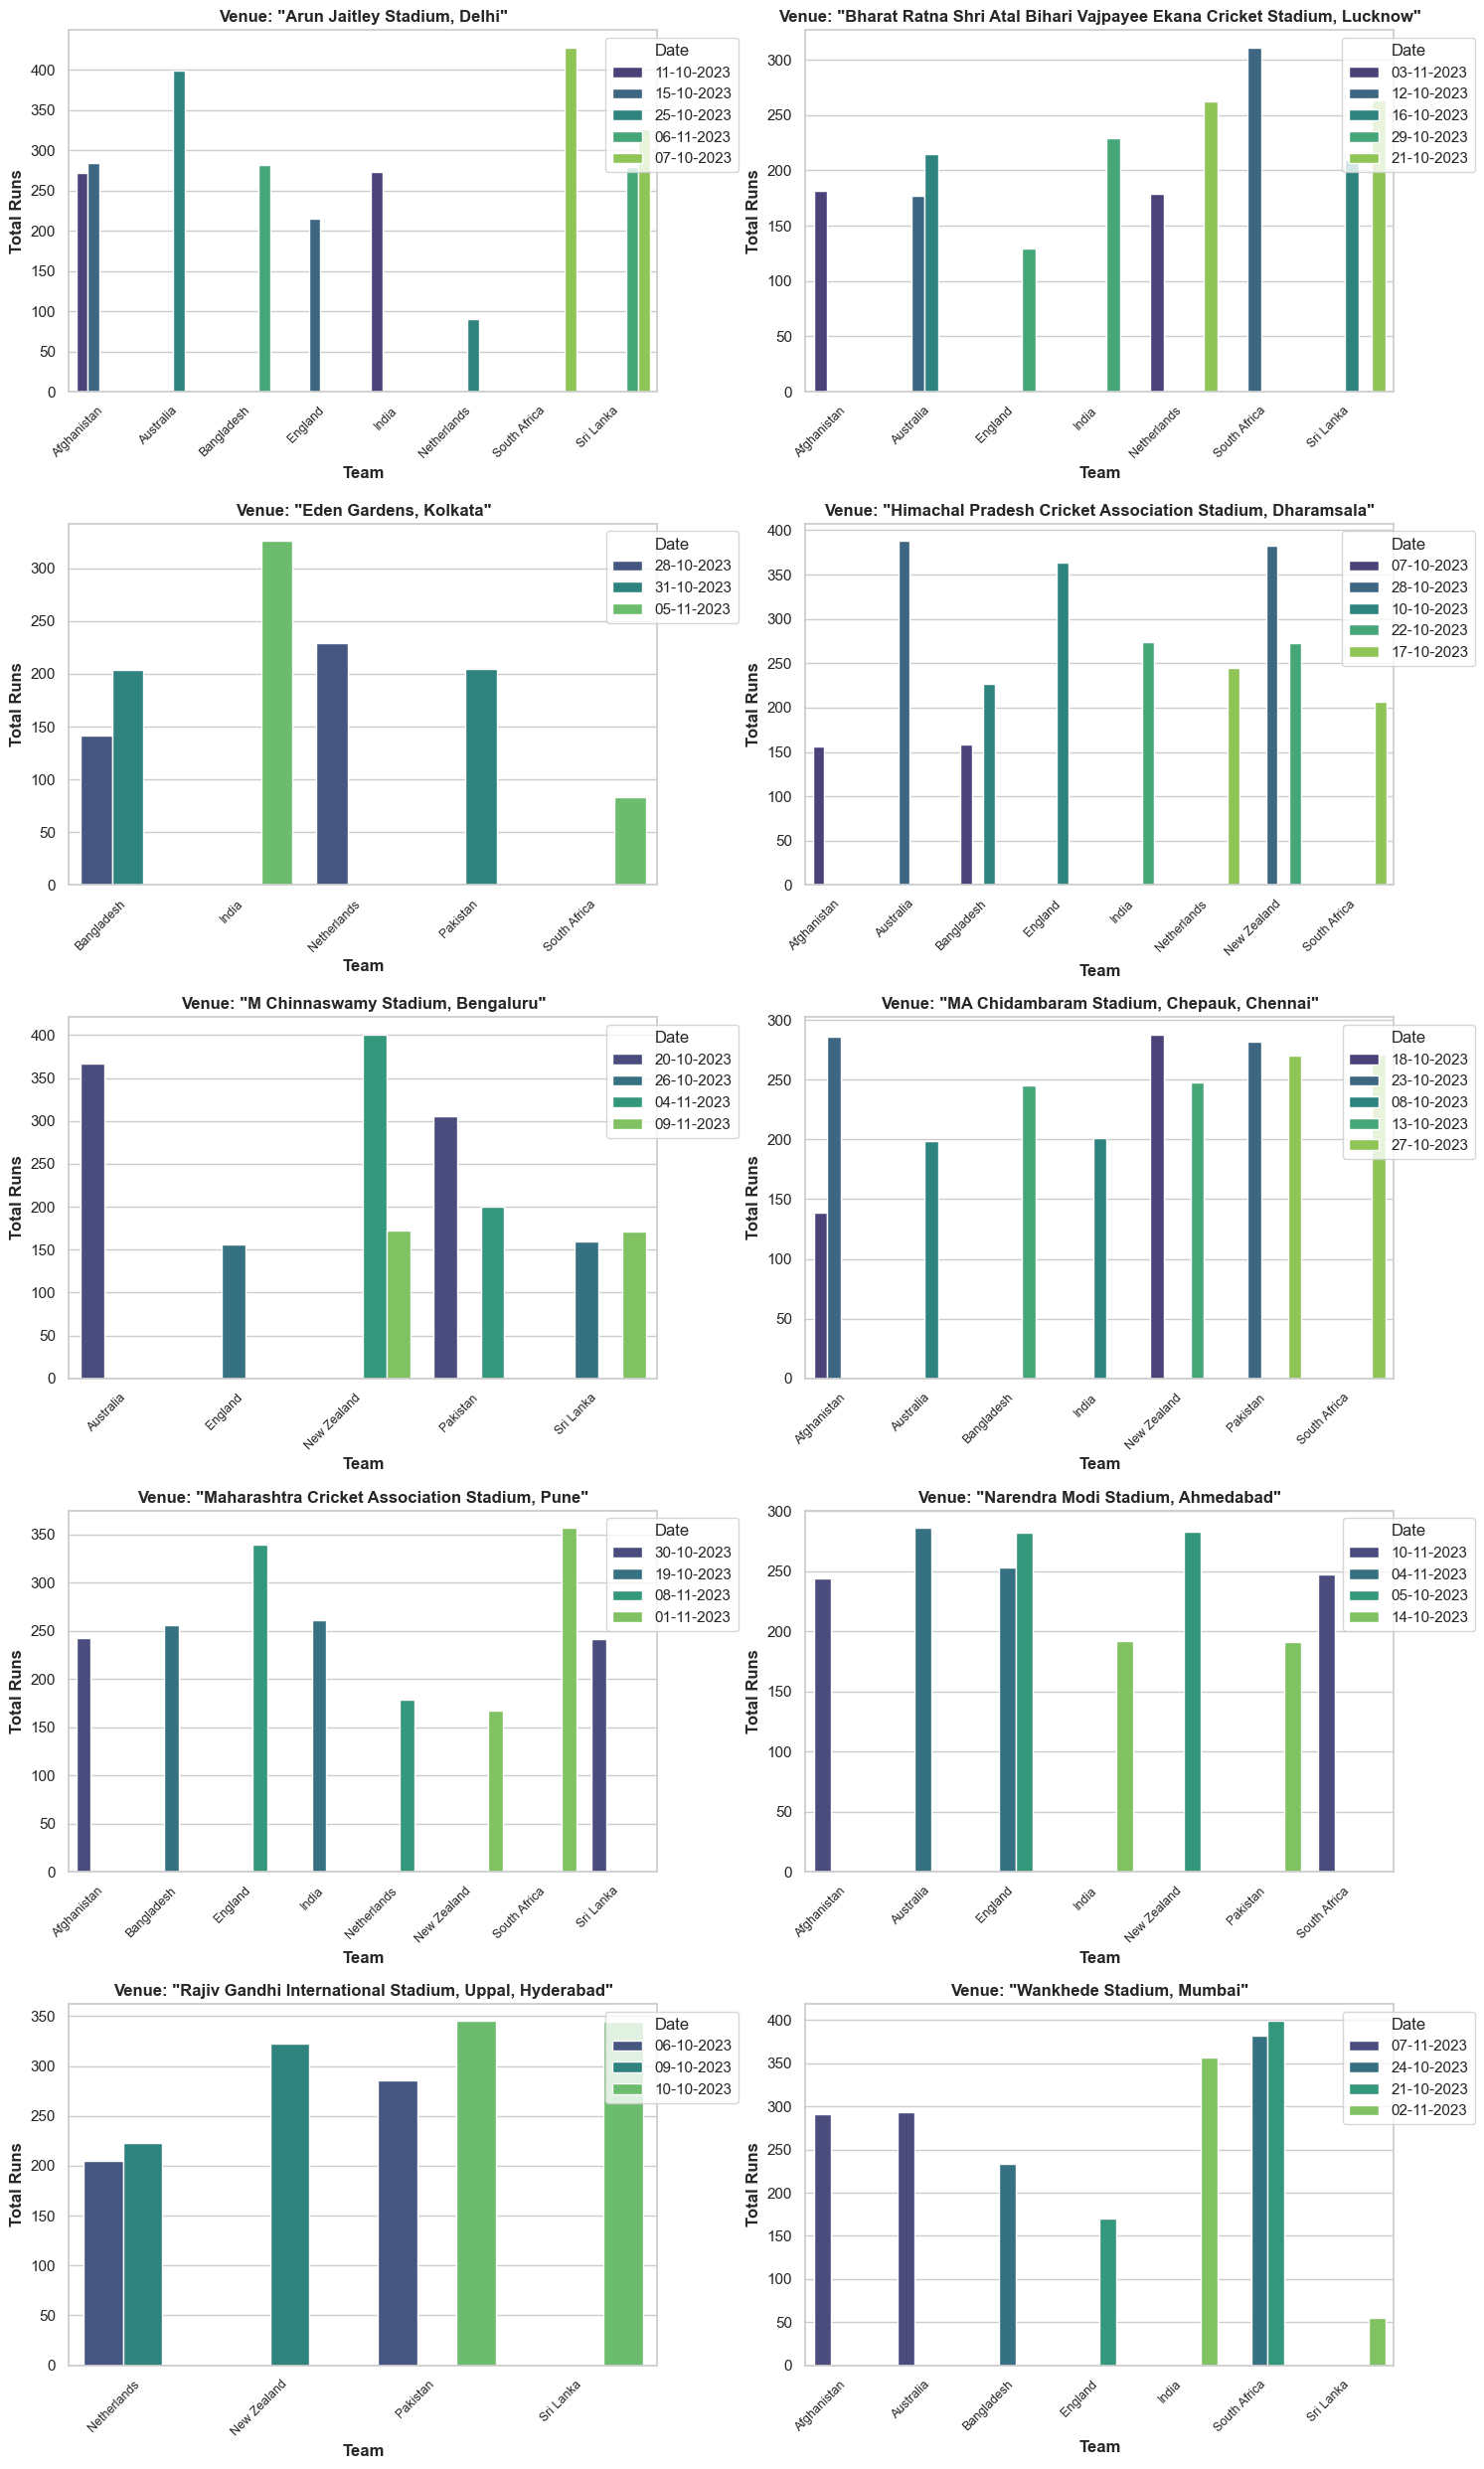

In [15]:
venue_team_date_runs = df.groupby(['Venue', 'Team', 'Date'])[
    'Total_Runs'].sum().reset_index()
sns.set(style="whitegrid")
unique_venues = venue_team_date_runs['Venue'].unique()

num_rows = len(unique_venues) // 2
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
ax = ax.ravel()

for i, venue in enumerate(unique_venues):
    venue_data = venue_team_date_runs[venue_team_date_runs['Venue'] == venue]
    plt.sca(ax[i])


    sns.barplot(x='Team', y='Total_Runs', data=venue_data,
                palette='viridis', hue='Date', dodge=True, ax=ax[i])
    plt.xticks(rotation=45, ha='right', fontsize=9)

    ax[i].set_xlabel('Team', weight='bold')
    ax[i].set_ylabel('Total Runs', weight='bold')
    ax[i].set_title(f'Venue: "{venue}"', weight='bold')
    ax[i].legend(title='Date', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

It looks like venue does not affect much on teams.


Now, let's see for each team, which are best batsmen of that team. by summing up the total score over all the matches for the geven team.


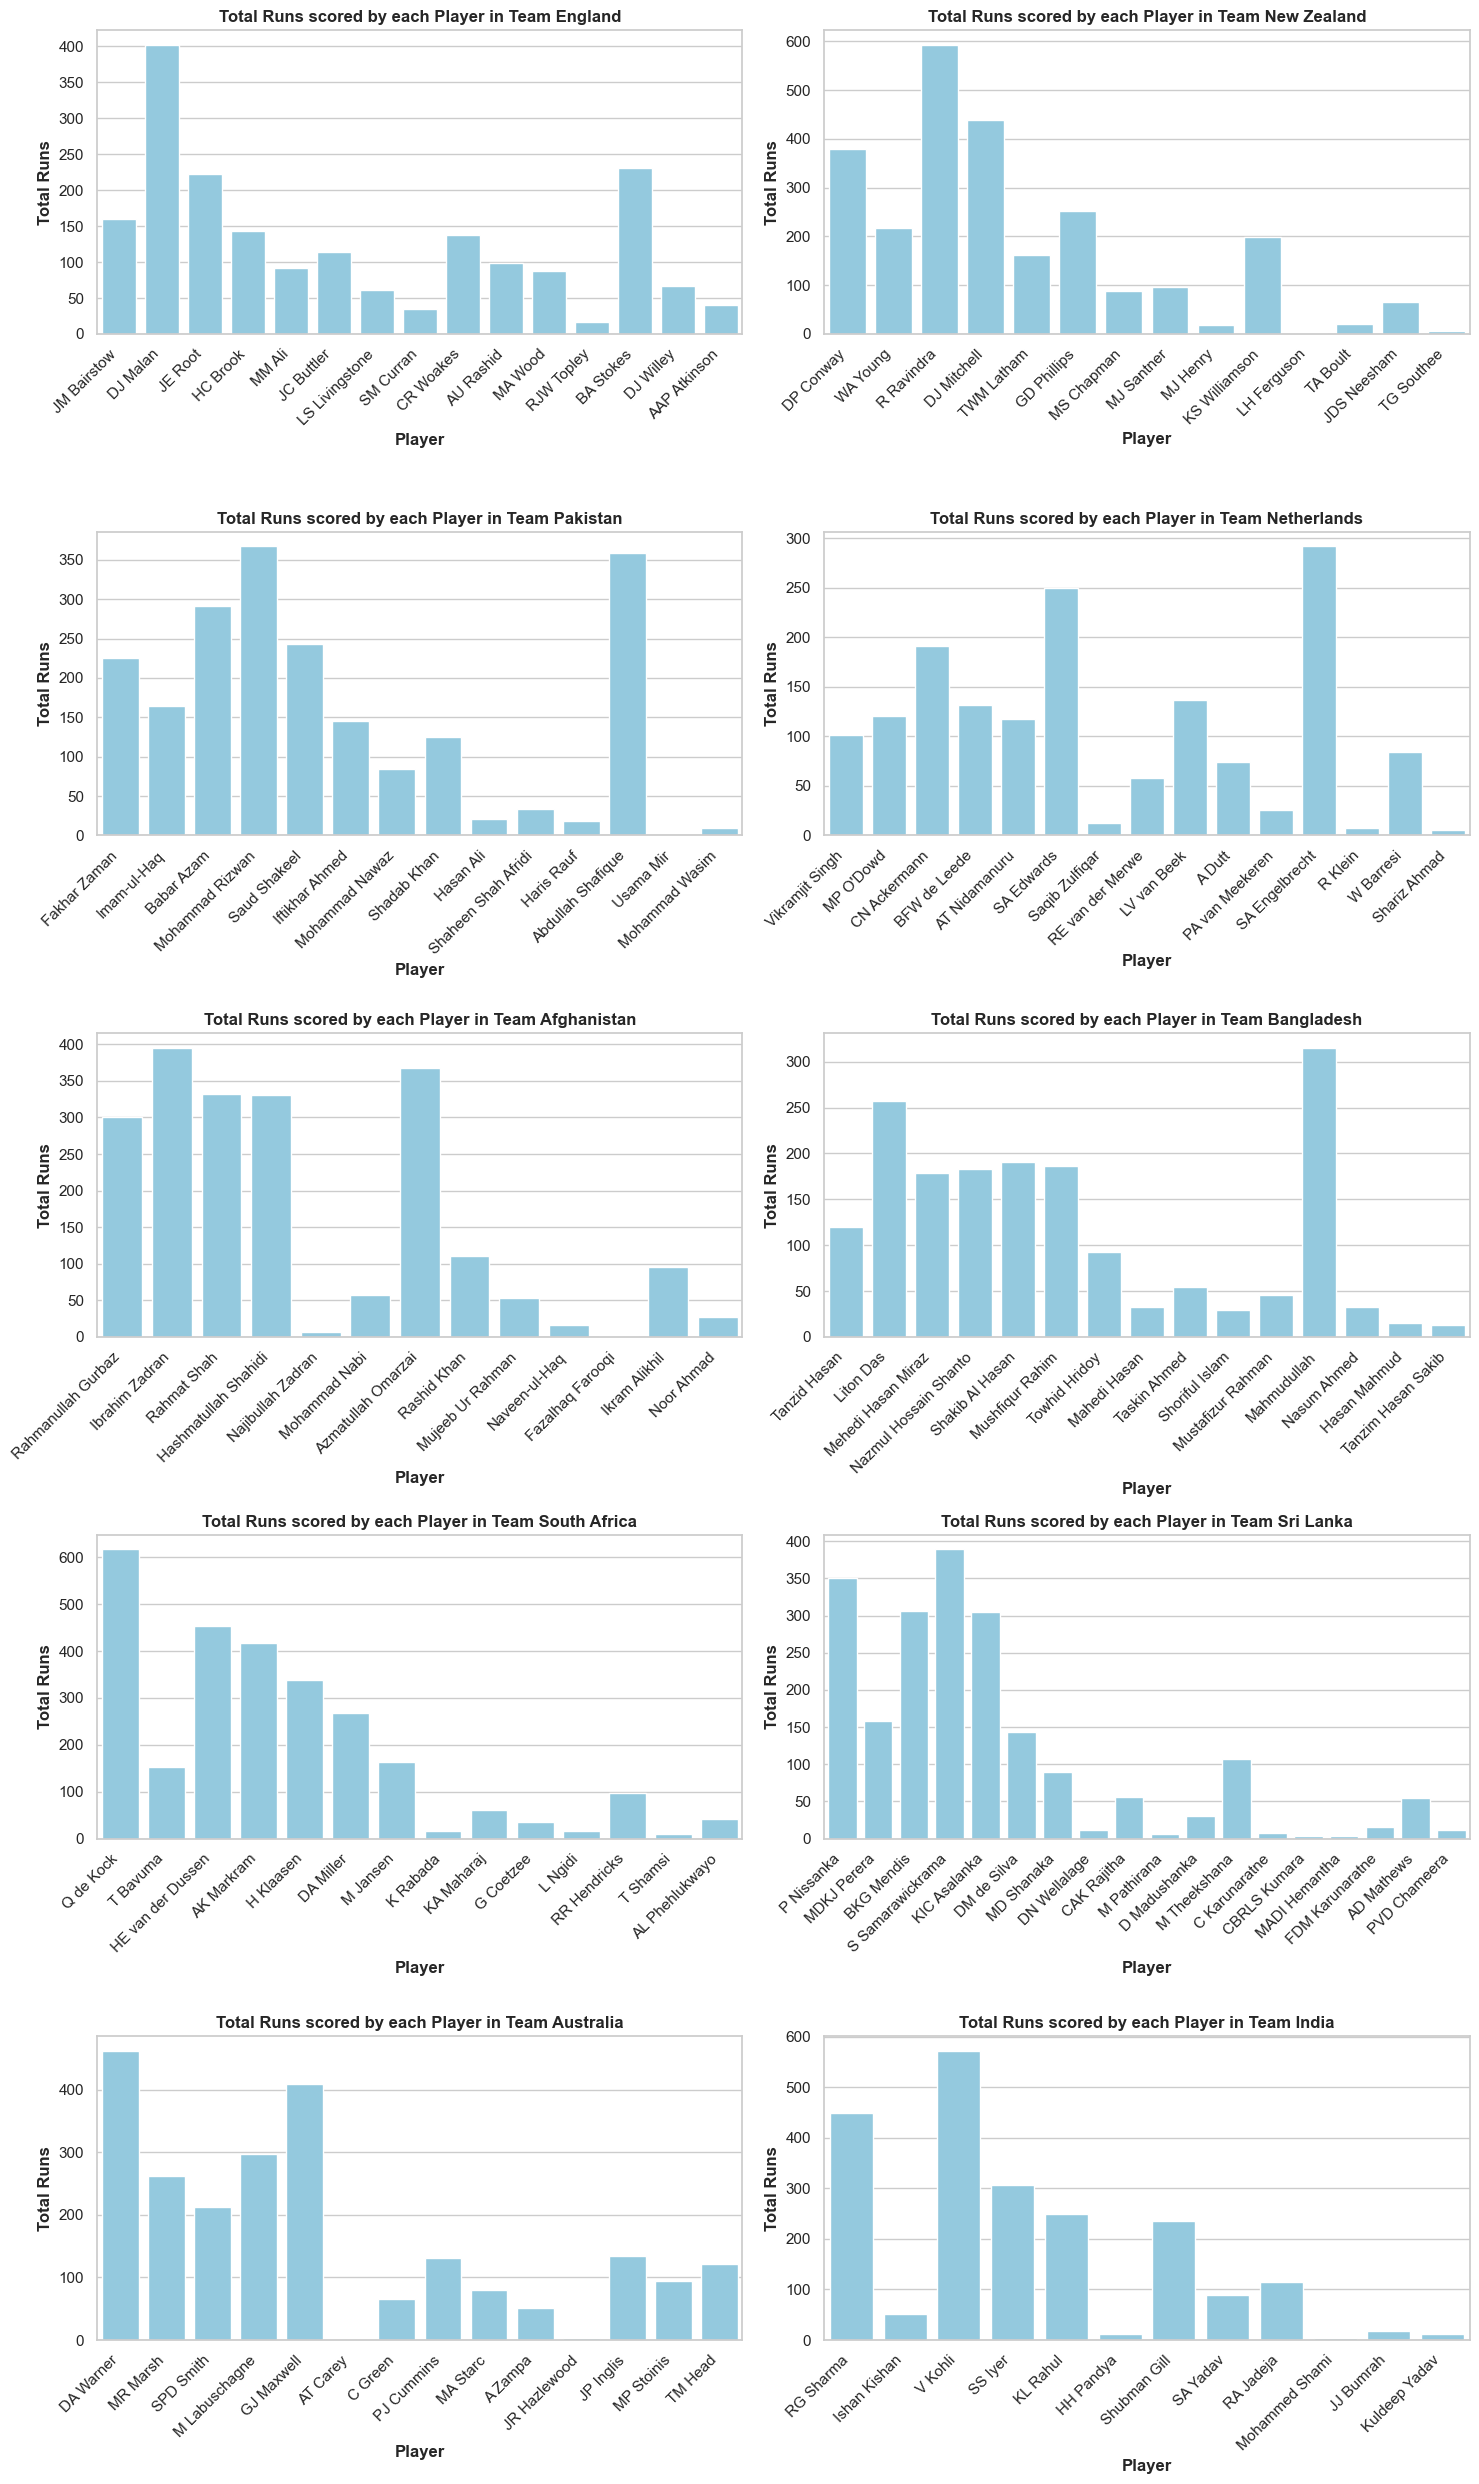

In [16]:
sns.set(style="whitegrid")

num_rows = len(team_players) // 2
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
ax = ax.ravel()

for i, team in enumerate(team_players):
    team_players_data = df[df['Team'] == team]
    plt.sca(ax[i])

    # print(f"{team}: {team_players[team]}")
    for player in team_players[team]:
        player_data = team_players_data[team_players_data['Batsman'] == player]
        total_runs = player_data['Total_Runs'].sum()
        sns.barplot(x=[player], y=[total_runs], color='skyblue')

    plt.xlabel('Player', weight='bold')
    plt.ylabel('Total Runs', weight='bold')
    plt.title(f'Total Runs scored by each Player in Team {team}', weight='bold')


    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Almost every team consists atleast one batsman who has scored 400 or more runs in his ODI WC 2023 career. Some of the batsmen have also scored nearly 600 runs. There is a very high chances that, our bestman with most runs could be one of them.


In [ ]:
# convert date column to datetime format
date_format = '%Y-%m-%d'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)

In [ ]:
# calculating comulative runs for each player
df = df.sort_values(by=['Date', 'Over', 'Balls'])
df['Cumulative_Runs'] = df.groupby(['Batsman', 'Date'])['Runs'].cumsum()

In [ ]:
df = df.sort_values(by=['Batsman', 'Date'])

# Calculate the cumulative count for each batsman
df['Balls_Played'] = df.groupby(['Batsman', 'Date']).cumcount() + 1

# Calculate the strike rate for each row
df['Strike_Rate'] = round(
    (df['Cumulative_Runs'] / df['Balls_Played']) * 100, 2)

df.sort_index(inplace=True)
df.head(10)

,Date,Winner,Inning,Team,Over,Balls,Batsman,Bowler,Non_Striker,Runs,Extras,Total_Runs,Venue,Wicket,Wicket_Type,Cumulative_Runs,Balls_Played,Strike_Rate
0,2023-10-05,New Zealand,1,England,0,1,JM Bairstow,TA Boult,DJ Malan,0,0,0,"Narendra Modi Stadium, Ahmedabad",Not Out,None,0,1,0.00
1,2023-10-05,New Zealand,1,England,0,2,JM Bairstow,TA Boult,DJ Malan,6,0,6,"Narendra Modi Stadium, Ahmedabad",Not Out,None,6,2,300.00
2,2023-10-05,New Zealand,1,England,0,3,JM Bairstow,TA Boult,DJ Malan,1,0,1,"Narendra Modi Stadium, Ahmedabad",Not Out,None,7,3,233.33
3,2023-10-05,New Zealand,1,England,0,4,DJ Malan,TA Boult,JM Bairstow,1,0,1,"Narendra Modi Stadium, Ahmedabad",Not Out,None,1,1,100.00
4,2023-10-05,New Zealand,1,England,0,5,JM Bairstow,TA Boult,DJ Malan,4,0,4,"Narendra Modi Stadium, Ahmedabad",Not Out,None,11,4,275.00
5,2023-10-05,New Zealand,1,England,0,6,JM Bairstow,TA Boult,DJ Malan,0,0,0,"Narendra Modi Stadium, Ahmedabad",Not Out,None,11,5,220.00
6,2023-10-05,New Zealand,1,England,1,7,DJ Malan,MJ Henry,JM Bairstow,0,0,0,"Narendra Modi Stadium, Ahmedabad",Not Out,None,1,2,50.00
7,2023-10-05,New Zealand,1,England,1,8,DJ Malan,MJ Henry,JM Bairstow,0,0,0,"Narendra Modi Stadium, Ahmedabad",Not Out,None,1,3,33.33
8,2023-10-05,New Zealand,1,England,1,9,DJ Malan,MJ Henry,JM Bairstow,0,0,0,"Narendra Modi Stadium, Ahmedabad",Not Out,None,1,4,25.00
9,2023-10-05,New Zealand,1,England,1,10,DJ Malan,MJ Henry,JM Bairstow,0,0,0,"Narendra Modi Stadium, Ahmedabad",Not Out,None,1,5,20.00


It is self-understandable that, as there are only a few matches left in the world cup, there are very high chances that only those players who has most runs till now, only one of them can be the batsman with most runs.

So, making the list of batsman who has score over 150 runs.

Also, only India, Australia, New Zealand, and South Africa will be in the semi-final. So, batsmen belonging to this team, can score additional runs, other then this team, there are no chances that there batsmen will score more than that they currently have.

In [ ]:
selected_batsmen_table = df.groupby('Batsman').filter(lambda x: x['Runs'].sum() > 150 and any(team in ['India', 'New Zealand', 'Australia', 'South Africa'] for team in x['Team']))
selected_batsmen_table = selected_batsmen_table.groupby('Batsman')['Runs'].sum().reset_index()
print(selected_batsmen_table)

              Batsman  Runs
0          AK Markram   396
1           DA Miller   255
2           DA Warner   446
3         DJ Mitchell   418
4           DP Conway   359
5         GD Phillips   244
6          GJ Maxwell   397
7           H Klaasen   326
8   HE van der Dussen   442
9            KL Rahul   245
10      KS Williamson   187
11           M Jansen   157
12      M Labuschagne   286
13           MR Marsh   249
14          Q de Kock   591
15         R Ravindra   565
16          RG Sharma   442
17          SPD Smith   205
18            SS Iyer   293
19       Shubman Gill   219
20         TWM Latham   155
21            V Kohli   543
22           WA Young   206


Plot the strike-rate for all this batsmen and all of their matches.

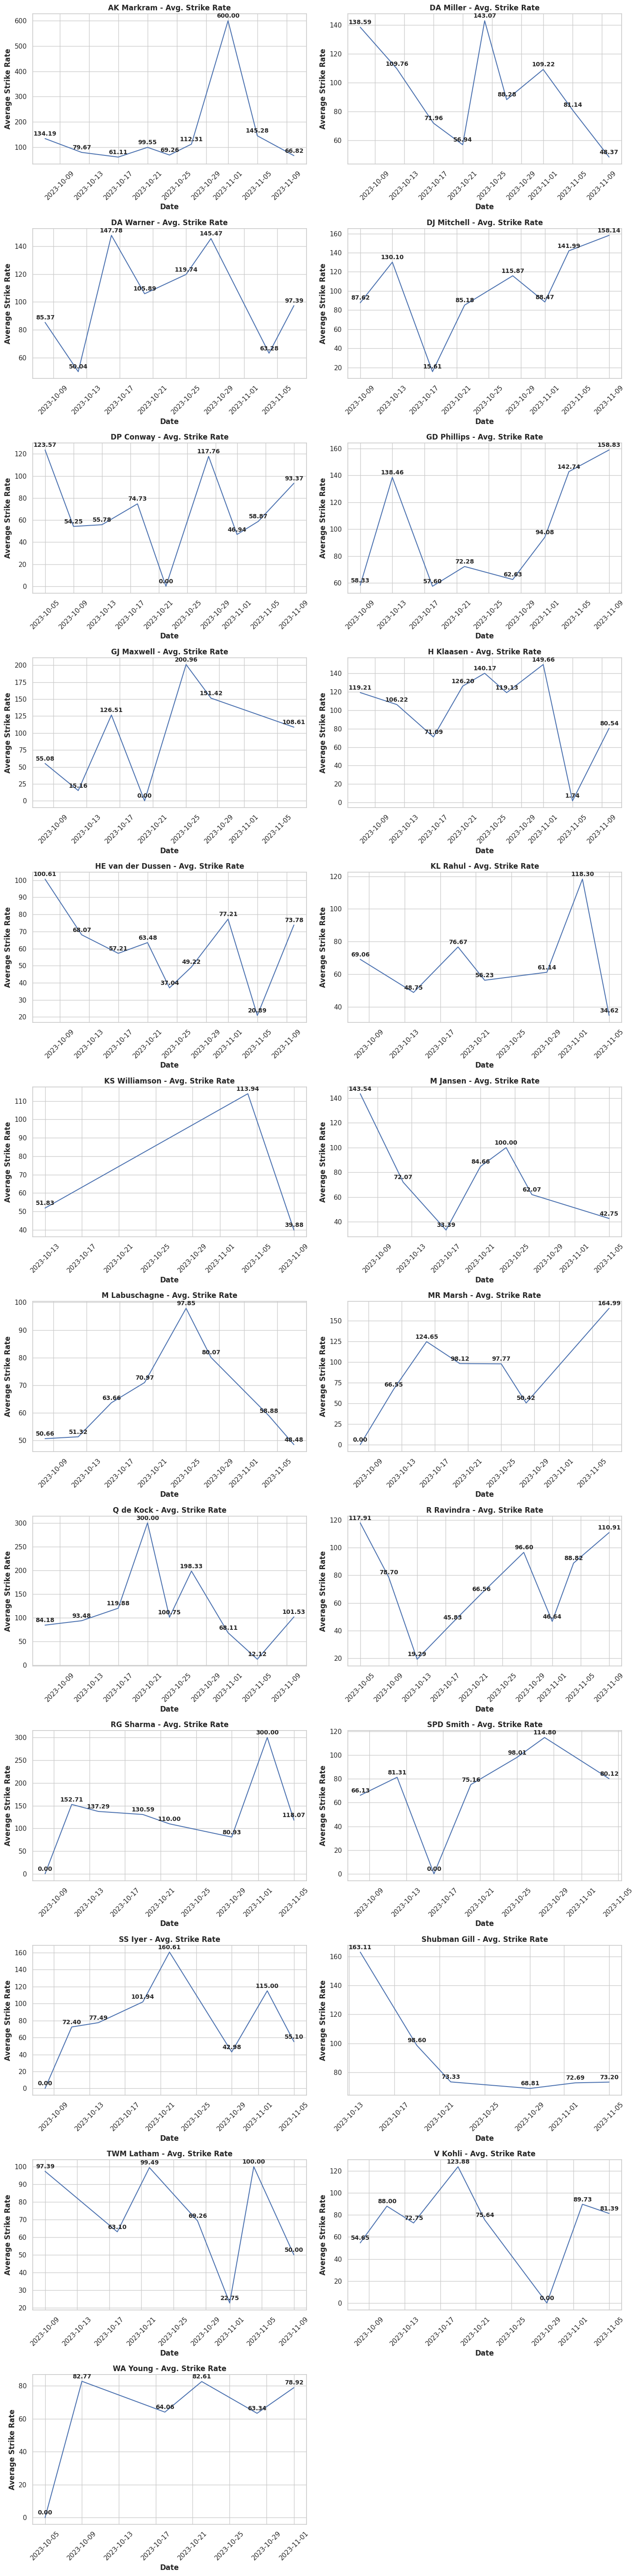

<Figure size 1200x600 with 0 Axes>

In [ ]:
selected_batsmen_data = df[df['Batsman'].isin(selected_batsmen_table['Batsman'])].copy()
selected_batsmen_data = selected_batsmen_data.sort_values(by=['Batsman', 'Date'])
average_strike_rate = selected_batsmen_data.groupby(['Batsman', 'Date'])['Strike_Rate'].mean().reset_index()

num_rows = (len(selected_batsmen_table['Batsman'].unique()) + 1) // 2
num_cols = 2

fig, ax = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows), tight_layout=True)
ax = ax.ravel()

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
for i, batsman in enumerate(selected_batsmen_table['Batsman']):
    batsman_data = average_strike_rate[average_strike_rate['Batsman'] == batsman]

    # Plot on the corresponding subplot
    ax[i].plot(batsman_data['Date'], batsman_data['Strike_Rate'])
    ax[i].set_title(f'{batsman} - Avg. Strike Rate', weight='bold')
    ax[i].set_xlabel('Date', weight='bold')
    ax[i].set_ylabel('Average Strike Rate', weight='bold')
    ax[i].tick_params(axis='x', rotation=45)
    ax[i].grid(True)

    for x, y in zip(batsman_data['Date'], batsman_data['Strike_Rate']):
        ax[i].annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=10, weight='bold')

# Removing extra graphs
for j in range(len(selected_batsmen_table['Batsman'].unique()), num_cols * num_rows):
    fig.delaxes(ax[j])

# Adjust layout
plt.tight_layout()
plt.show()

It can be seen that, for all the batsman their average strike rate, keeps in certain range, other than the points, where it gets too high (like 300, 600), because I am calculating strike rate for per ball played, and sometime batsman can get out after scoring 6 runs in 1 ball.
Other their these occurances, the average strike rate keeps in one range.

# 4. Pre-Processing

Creating a new dataset match_df, which consists the data for batsmen that how much total runs they scored in there each match. (Each row represents one match)

In [ ]:
temp = df[['Date', 'Balls_Played', 'Batsman', 'Total_Runs', 'Wicket', 'Strike_Rate', 'Team']]
# temp

In [ ]:
data = temp.groupby(['Date', 'Batsman'])

def custom_agg(group):
    max_balls_played_index = group['Balls_Played'].idxmax()
    return pd.Series({
        # 'Date': group.loc[max_balls_played_index, 'Date'],
        # 'Batsman': group.loc[max_balls_played_index, 'Batsman'],
        'Team': group.loc[max_balls_played_index, 'Team'],
        # 'Inning': group.loc[max_balls_played_index, 'Inning'],
        'Balls_Played': group.loc[max_balls_played_index, 'Balls_Played'],
        # 'Venue': group.loc[max_balls_played_index, 'Venue'],
        'Wicket': group.loc[max_balls_played_index, 'Wicket'],
        'Strike_Rate': group['Strike_Rate'].mean(),
        'Total_Runs': group['Total_Runs'].sum(),
    })

match_df = data.apply(custom_agg).reset_index()

Adding data for matches Bangladesh vs Australia (11 Nov. 2023), England vs Pakistan (11 Nov. 2023) and India vs Netherlands (12 Nov. 2023).

In [ ]:
# Date	Batsman	Team	Balls_Played	Wicket	Strike_Rate	Total_Runs
Bangladesh = [['2023-11-11', 'Tanzim Hasan Sakib', 'Bangladesh', 34, 'Out', 105.9, 36],
              ['2023-11-11', 'Liton Das', 'Bangladesh', 45, 'Out', 80.0, 36],
              ['2023-11-11', 'Nazmul Hossain Shanto', 'Bangladesh', 57, 'Out', 78.9, 45],
              ['2023-11-11', 'Towhid Hridoy', 'Bangladesh', 79, 'Out', 93.7, 74],
              ['2023-11-11', 'Mahmudullah', 'Bangladesh', 28, 'Out', 114.3, 32],
              ['2023-11-11', 'Mushfiqur Rahim', 'Bangladesh', 24, 'Out', 87.5, 21],
              ['2023-11-11', 'Mehedi Hasan Miraz', 'Bangladesh', 20, 'Out', 145.0, 29],
              ['2023-11-11', 'Nasum Ahmed', 'Bangladesh', 11, 'Out', 63.6, 7],
              ['2023-11-11', 'Mahedi Hasan', 'Bangladesh', 3, 'Not Out', 66.7, 2],
              ['2023-11-11', 'Taskin Ahmed', 'Bangladesh', 1, 'Not Out', 0.0, 0]]

Australia = [['2023-11-11', 'TM Head', 'Australia', 11, 'Out', 90.9, 10],
             ['2023-11-11', 'DA Warner', 'Australia', 61, 'Out', 86.9, 53],
             ['2023-11-11', 'MR Marsh', 'Australia', 132, 'Not Out', 134.1, 177],
             ['2023-11-11', 'SPD Smith', 'Australia', 64, 'Not Out', 98.4, 63]]

In [ ]:
# Date	Batsman	Team	Balls_Played	Wicket	Strike_Rate	Total_Runs
England = [['2023-11-11', 'DJ Malan', 'England', 39, 'Out', 79.5, 31],
           ['2023-11-11', 'JM Bairstow', 'England', 61, 'Out', 96.7, 59],
           ['2023-11-11', 'JE Root', 'England', 72, 'Out', 83.3, 60],
           ['2023-11-11', 'BA Stokes', 'England', 76, 'Out', 110.5, 84],
           ['2023-11-11', 'JC Buttler', 'England', 18, 'Out', 150, 27],
           ['2023-11-11', 'HC Brook', 'England', 17, 'Out', 176.5, 30],
           ['2023-11-11', 'MM Ali', 'England', 6, 'Out', 133.3, 8],
           ['2023-11-11', 'CR Woakes', 'England', 4, 'Not Out', 100, 4],
           ['2023-11-11', 'DJ Willey', 'England', 5, 'Out', 300, 15],
           ['2023-11-11', 'AAP Atkinson', 'England', 1, 'Out', 0.0, 0],
           ['2023-11-11', 'AU Rashid', 'England', 1, 'Not Out', 0.0, 0]]

Pakistan = [['2023-11-11', 'Abdullah Shafique', 'Pakistan', 2, 'Out', 0, 0],
            ['2023-11-11', 'Fakhar Zaman', 'Pakistan', 9, 'Out', 11.1, 1],
            ['2023-11-11', 'Babar Azam', 'Pakistan', 45, 'Out', 84.4, 38],
            ['2023-11-11', 'Mohammad Rizwan', 'Pakistan', 51, 'Out', 70.6, 36],
            ['2023-11-11', 'Saud Shakeel', 'Pakistan', 37, 'Out', 78.4, 29],
            ['2023-11-11', 'Agha Salman', 'Pakistan', 45, 'Out', 113.3, 51],
            ['2023-11-11', 'Iftikhar Ahmed', 'Pakistan', 5, 'Out', 60, 3],
            ['2023-11-11', 'Shadab Khan', 'Pakistan', 7, 'Out', 57.1, 4],
            ['2023-11-11', 'Shaheen Shah Afridi', 'Pakistan', 23, 'Out', 108.7, 25],
            ['2023-11-11', 'Mohammad Wasim', 'Pakistan', 14, 'Not Out', 114.3, 16],
            ['2023-11-11', 'Haris Rauf', 'Pakistan', 23, 'Out', 152.2, 35]]

In [ ]:
# Date	Batsman	Team	Balls_Played	Wicket	Strike_Rate	Total_Runs
India = [['2023-11-12', 'RG Sharma', 'India', 54, 'Out', 113, 61],
         ['2023-11-12', 'Shubman Gill', 'India', 32, 'Out', 159.4, 51],
         ['2023-11-12', 'V Kohli', 'India', 56, 'Out', 91.1, 51],
         ['2023-11-12', 'SS Iyer', 'India', 94, 'Not Out', 136.2, 128],
         ['2023-11-12', 'KL Rahul', 'India', 64, 'Out', 159.4, 102],
         ['2023-11-12', 'SA Yadav', 'India', 1, 'Not Out', 200, 2]]

Netherlands = [['2023-11-12', 'W Barresi', 'Netherlands', 5, 'Out', 80, 4],
               ['2023-11-12', "MP O'Dowd", 'Netherlands', 42, 'Out', 71.4, 30],
               ['2023-11-12', 'CN Ackermann', 'Netherlands', 32, 'Out', 109.4, 35],
               ['2023-11-12', 'SA Engelbrecht', 'Netherlands', 80, ' Out', 56.3, 45],
               ['2023-11-12', 'SA Edwards', 'Netherlands', 30, 'Out', 56.7, 17],
               ['2023-11-12', 'BFW de Leede', 'Netherlands', 21, 'Out', 57.1, 12],
               ['2023-11-12', 'AT Nidamanuru', 'Netherlands', 39, 'Out', 138.5, 54],
               ['2023-11-12', 'LV van Beek', 'Netherlands', 15, 'Out', 106.7, 16],
               ['2023-11-12', 'RE van der Merwe', 'Netherlands', 8, 'Out', 200, 16],
               ['2023-11-12', 'A Dutt', 'Netherlands', 11, 'Out', 45.5, 5],
               ['2023-11-12', 'PA van Meekeren', 'Netherlands', 4, 'Not Out', 75, 3]]

In [ ]:
columns = ['Date', 'Batsman', 'Team', 'Balls_Played', 'Wicket', 'Strike_Rate', 'Total_Runs']

Bangladesh = pd.DataFrame(Bangladesh, columns=columns)
Australia = pd.DataFrame(Australia, columns=columns)
England = pd.DataFrame(England, columns=columns)
Pakistan = pd.DataFrame(Pakistan, columns=columns)
India = pd.DataFrame(India, columns=columns)
Australia = pd.DataFrame(Australia, columns=columns)

In [ ]:
match_df = pd.concat([match_df, Bangladesh, Australia, England, Pakistan, India, Australia], axis=0, ignore_index=True).drop_duplicates().reset_index(drop=True)

In [ ]:
match_df['Date'] = pd.to_datetime(match_df['Date'], format=date_format)

In [ ]:
match_df.head()

,Date,Batsman,Team,Balls_Played,Wicket,Strike_Rate,Total_Runs
0,2023-10-05,AU Rashid,England,14,Not Out,83.198571,18
1,2023-10-05,CR Woakes,England,12,Out,100.390000,11
2,2023-10-05,DJ Malan,England,25,Out,54.434400,15
3,2023-10-05,DP Conway,New Zealand,122,Not Out,123.566311,158
4,2023-10-05,HC Brook,England,16,Out,107.076250,25


In [ ]:
batsmen_decoded = match_df['Batsman']
teams_decoded = match_df['Team']

In [ ]:
dummies = pd.get_dummies(match_df['Wicket'], dtype=int)
match_df = pd.concat([dummies, match_df], axis=1)

In [ ]:
match_df.drop(['Wicket'], axis=1, inplace=True)
match_df

,Not Out,Out,Date,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
0,1,0,2023-10-05,AU Rashid,England,14,83.198571,18
1,0,1,2023-10-05,CR Woakes,England,12,100.390000,11
2,0,1,2023-10-05,DJ Malan,England,25,54.434400,15
3,1,0,2023-10-05,DP Conway,New Zealand,122,123.566311,158
4,0,1,2023-10-05,HC Brook,England,16,107.076250,25
...,...,...,...,...,...,...,...,...
801,0,1,2023-11-12,Shubman Gill,India,32,159.400000,51
802,0,1,2023-11-12,V Kohli,India,56,91.100000,51
803,1,0,2023-11-12,SS Iyer,India,94,136.200000,128
804,0,1,2023-11-12,KL Rahul,India,64,159.400000,102


In [ ]:
selected_teams = ['India', 'New Zealand', 'South Africa', 'Australia']

In [ ]:
selected_batsmen = selected_batsmen_table['Batsman'].tolist()
selected_batsmen

['AK Markram',
 'DA Miller',
 'DA Warner',
 'DJ Mitchell',
 'DP Conway',
 'GD Phillips',
 'GJ Maxwell',
 'H Klaasen',
 'HE van der Dussen',
 'KL Rahul',
 'KS Williamson',
 'M Jansen',
 'M Labuschagne',
 'MR Marsh',
 'Q de Kock',
 'R Ravindra',
 'RG Sharma',
 'SPD Smith',
 'SS Iyer',
 'Shubman Gill',
 'TWM Latham',
 'V Kohli',
 'WA Young']

In [ ]:
selected_batsmen_df = match_df.groupby('Batsman').filter(lambda x: any(batsman in selected_batsmen for batsman in x['Batsman']) and any(team in selected_teams for team in x['Team']))
selected_batsmen_df

,Not Out,Out,Date,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
3,1,0,2023-10-05,DP Conway,New Zealand,122,123.566311,158
11,1,0,2023-10-05,R Ravindra,New Zealand,98,117.910306,125
13,0,1,2023-10-05,WA Young,New Zealand,1,0.000000,0
36,0,1,2023-10-07,AK Markram,South Africa,57,134.190000,114
41,1,0,2023-10-07,DA Miller,South Africa,24,138.587083,43
...,...,...,...,...,...,...,...,...
800,0,1,2023-11-12,RG Sharma,India,54,113.000000,61
801,0,1,2023-11-12,Shubman Gill,India,32,159.400000,51
802,0,1,2023-11-12,V Kohli,India,56,91.100000,51
803,1,0,2023-11-12,SS Iyer,India,94,136.200000,128


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def transform_cols(x):
    le = LabelEncoder()
    x_encoded = le.fit_transform(x) + 1
    return x_encoded, le

In [ ]:
def inverse_transform_cols(x, le):
    x = x - 1
    x_inverse = le.inverse_transform(x)
    return x_inverse

In [ ]:
encoders = {}
encode_cols = ['Batsman', 'Team']

for col in encode_cols:
    match_df[col], encoders[col] = transform_cols(match_df[col])

In [ ]:
batsmen_encoded = match_df['Batsman']
teams_encoded = match_df['Team']

In [ ]:
batsmen_map = {}

# for i in range(len(batsmen_encoded)):
#     if batsmen_decoded[i] in selected_batsmen:
#       batsmen_map[batsmen_decoded[i]] = batsmen_encoded[i]

batsmen_map = {decoded: encoded for decoded, encoded in zip(batsmen_decoded, batsmen_encoded) if decoded in selected_batsmen}

batsmen_map

{'DP Conway': 31,
 'R Ravindra': 107,
 'WA Young': 145,
 'AK Markram': 5,
 'DA Miller': 24,
 'H Klaasen': 38,
 'HE van der Dussen': 40,
 'M Jansen': 69,
 'Q de Kock': 105,
 'DA Warner': 25,
 'GJ Maxwell': 37,
 'KL Rahul': 61,
 'M Labuschagne': 70,
 'MR Marsh': 83,
 'RG Sharma': 110,
 'SPD Smith': 121,
 'SS Iyer': 122,
 'V Kohli': 142,
 'DJ Mitchell': 27,
 'GD Phillips': 36,
 'TWM Latham': 136,
 'KS Williamson': 62,
 'Shubman Gill': 130}

In [ ]:
teams_map = {}
teams_map = {decoded: encoded for decoded, encoded in zip(teams_decoded, teams_encoded) if decoded in selected_teams}
teams_map

{'New Zealand': 7, 'South Africa': 9, 'Australia': 2, 'India': 5}

In [ ]:
match_df.drop('Date', axis=1, inplace=True)
selected_batsmen_df.drop('Date', axis=1, inplace=True)
match_df

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
0,1,0,9,4,14,83.198571,18
1,0,1,22,4,12,100.390000,11
2,0,1,26,4,25,54.434400,15
3,1,0,31,7,122,123.566311,158
4,0,1,39,4,16,107.076250,25
...,...,...,...,...,...,...,...
801,0,1,130,5,32,159.400000,51
802,0,1,142,5,56,91.100000,51
803,1,0,122,5,94,136.200000,128
804,0,1,61,5,64,159.400000,102


In [ ]:
selected_batsmen_df['Batsman'] = selected_batsmen_df['Batsman'].map(batsmen_map)
selected_batsmen_df['Team'] = selected_batsmen_df['Team'].map(teams_map)

In [ ]:
selected_batsmen_df.sort_values(by='Batsman', inplace=True)
selected_batsmen_df

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
451,0,1,5,9,96,112.307500,97
568,1,0,5,9,1,600.000000,6
746,0,1,5,9,32,66.821875,26
397,0,1,5,9,70,69.258286,61
331,0,1,5,9,46,99.549783,45
...,...,...,...,...,...,...,...
107,0,1,145,7,80,82.773875,71
13,0,1,145,7,1,0.000000,0
584,0,1,145,7,37,78.915135,34
514,0,1,145,7,39,63.339744,40


# 5. Modelling

It is confirmed that, the Semi-Finale will matches will happen between India vs. New Zealand and South Africa vs. Australia.

As per the prediction in task-2, the Finale will happen between India and South Africa.

I am going to predict the score for batsmen in these 4 teams, from my selected_batsmen list for Semi-Finale and Finale, using RNN and LSTM model.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalizing numeric columns
scaler = MinMaxScaler()
match_df[['Balls_Played', 'Strike_Rate', 'Total_Runs']] = scaler.fit_transform(match_df[['Balls_Played', 'Strike_Rate', 'Total_Runs']])

In [ ]:
match_df.sort_values('Batsman', inplace=True)
match_df.head(7)

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
14,0,1,1,6,0.006757,0.125000,0.004831
473,0,1,1,6,0.040541,0.092517,0.072464
88,0,1,1,6,0.128378,0.081230,0.053140
252,1,0,1,6,0.060811,0.280343,0.115942
706,0,1,1,6,0.013514,0.101850,0.004831
329,1,0,1,6,0.040541,0.119102,0.048309
605,1,0,1,6,0.148649,0.057636,0.053140


In [ ]:
selected_batsmen_df.sort_values('Batsman', inplace=True)
len(selected_batsmen_df)

184

In [ ]:
# Creating sequence length for LSTM
sequence_length = 3
X, y = [], []

for i in range(len(match_df) - sequence_length):
    X.append(match_df.iloc[i:i+sequence_length, :-1])
    y.append(match_df.iloc[i+sequence_length-1, -1])

X, y = np.array(X), np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Build LSTM Model
model = Sequential()
model.add(LSTM(units=128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=30))
model.add(Dense(units=1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/20
21/21 [==============================] - 2s 21ms/step - loss: 3.3609 - val_loss: 0.8699
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3142 - val_loss: 0.0856
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0708 - val_loss: 0.0759
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0446 - val_loss: 0.0500
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0328 - val_loss: 0.0367
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0251 - val_loss: 0.0336
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0234 - val_loss: 0.0299
Epoch 8/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0230 - val_loss: 0.0290
Epoch 9/20
21/21 [==============================] - 0s 7ms/step - loss: 0.0211 - val_loss: 0.0285
Epoch 10/20
21/21 [==============================] - 0s 8ms/step - loss: 0.0206 - val_loss: 0.0269
Epoch 11/20
21/21 

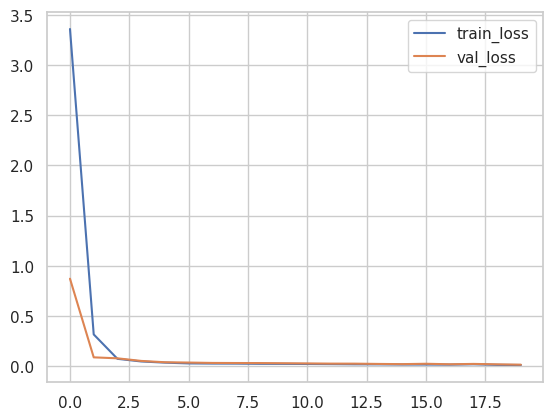

In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

Now, using this trained model to predict the score for selected batsmen

In [ ]:
selected_batsmen_encoded = selected_batsmen_df['Batsman'].unique()
print(f"selected_batsmen_encoded: {selected_batsmen_encoded}")
selected_team_encoded = selected_batsmen_df['Team'].unique()
print(f"selected_team_encoded: {selected_team_encoded}")

selected_batsmen_encoded: [  5  24  25  27  31  36  37  38  40  61  62  69  70  83 105 107 110 121
 122 130 136 142 145]
selected_team_encoded: [9 2 7 5]


In [ ]:
# Function to predict runs for batsmen
def predict_runs_for_batsmen(model, selected_batsmen_df, scaler, sequence_length):
    selected_sequences = []
    for batsman in selected_batsmen_df['Batsman'].unique().tolist():
        batsman_data = selected_batsmen_df[selected_batsmen_df['Batsman'] == batsman]
        batsman_data = batsman_data.copy()
        # batsman_data[['Balls_Played', 'Strike_Rate', 'Total_Runs']] = scaler.transform(batsman_data[['Balls_Played', 'Strike_Rate', 'Total_Runs']])
        batsman_sequence = batsman_data.iloc[-sequence_length:, :-1].values  # Assuming the same features as the model input

        predicted_runs = model.predict(np.array([batsman_sequence]))

        avg_values = batsman_data.mean()
        # Not Out	Out	Batsman	Team	Balls_Played	Strike_Rate	Total_Runs
        predicted_row = pd.DataFrame({
            'Not Out': [int(avg_values['Not Out'])],
            'Out': [1 - int(avg_values['Not Out'])],
            'Batsman': [batsman],
            'Team': [int(avg_values['Team'])],
            'Balls_Played': [int(avg_values['Balls_Played'])],
            'Strike_Rate': [avg_values['Strike_Rate']],
            'Total_Runs': int(predicted_runs[0]),
        })

        print(predicted_row)
        selected_batsmen_df = pd.concat([selected_batsmen_df, predicted_row], ignore_index=True)

    selected_batsmen_df.sort_values(by='Batsman', inplace=True)

    return selected_batsmen_df

In [ ]:
predicted_df_initial = predict_runs_for_batsmen(model, selected_batsmen_df, scaler, sequence_length)

1/1 [==============================] - 0s 244ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1        5     9            39   152.020231          38
1/1 [==============================] - 0s 35ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       24     9            24    94.147996          15
1/1 [==============================] - 0s 35ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       25     2            53   100.205216          58
1/1 [==============================] - 0s 39ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       27     7            48   102.872098          51
1/1 [==============================] - 0s 39ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       31     7            40    69.475269          19
1/1 [==============================] - 

In [ ]:
predicted_df_initial

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
0,0,1,5,9,96,112.307500,97
8,0,1,5,9,46,79.666304,59
7,0,1,5,9,6,145.278333,9
6,0,1,5,9,57,134.190000,114
5,0,1,5,9,3,61.110000,1
...,...,...,...,...,...,...,...
179,0,1,145,7,64,64.061563,55
180,0,1,145,7,80,82.773875,71
181,0,1,145,7,1,0.000000,0
183,0,1,145,7,27,82.614444,17


I have predicted the scores for all the batsmen for their semi-finale matches.
Now, As per the result in task-2, the finale will be between India and South Africa.

So, I am  going to predict the score for those batsmen who belong to these teams, from selected_batsmen.

In [ ]:
finale_teams_decoded = ['India', 'South Africa']
finale_teams_encoded = [5, 9]

In [ ]:
finale_batsmen_df = predicted_df_initial[predicted_df_initial['Team'].isin(finale_teams_encoded)]
finale_batsmen_df.head()

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
0,0,1,5,9,96,112.307500,97
8,0,1,5,9,46,79.666304,59
7,0,1,5,9,6,145.278333,9
6,0,1,5,9,57,134.190000,114
5,0,1,5,9,3,61.110000,1


In [ ]:
finale_batsmen_encoded = finale_batsmen_df['Batsman'].unique().tolist()
finale_batsmen_decoded = [batsman for num in finale_batsmen_encoded for batsman, value in batsmen_map.items() if value == num]

In [ ]:
predicted_df_finale = predict_runs_for_batsmen(model, finale_batsmen_df, scaler, sequence_length)

1/1 [==============================] - 0s 23ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1        5     9            39   152.020231          43
1/1 [==============================] - 0s 24ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       24     9            24    94.147996          30
1/1 [==============================] - 0s 23ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       38     9            26   101.550588          26
1/1 [==============================] - 0s 23ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       40     9            56    60.833443          38
1/1 [==============================] - 0s 25ms/step
   Not Out  Out  Batsman  Team  Balls_Played  Strike_Rate  Total_Runs
0        0    1       61     5            46    78.020442          34
1/1 [==============================] - 0

In [ ]:
predicted_df_finale

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
0,0,1,5,9,96,112.307500,97
1,0,1,5,9,46,79.666304,59
2,0,1,5,9,6,145.278333,9
3,0,1,5,9,57,134.190000,114
4,0,1,5,9,3,61.110000,1
...,...,...,...,...,...,...,...
101,0,1,142,5,9,0.000000,0
100,1,0,142,5,98,123.880000,106
99,1,0,142,5,57,88.002632,60
97,0,1,142,5,56,91.100000,51


In [ ]:
final_df = pd.concat([predicted_df_initial, predicted_df_finale], ignore_index=True).drop_duplicates().reset_index(drop=True)

In [ ]:
final_df

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs
0,0,1,5,9,96,112.307500,97
1,0,1,5,9,46,79.666304,59
2,0,1,5,9,6,145.278333,9
3,0,1,5,9,57,134.190000,114
4,0,1,5,9,3,61.110000,1
...,...,...,...,...,...,...,...
213,0,1,105,9,61,119.820590,40
214,0,1,110,5,46,126.954089,47
215,0,1,122,5,44,84.634255,63
216,0,1,130,5,37,101.305970,33


In [ ]:
final_df[final_df['Batsman'] == 141]

,Not Out,Out,Batsman,Team,Balls_Played,Strike_Rate,Total_Runs


In [ ]:
batsmen_name_map = {v: k for k, v in batsmen_map.items()}
teams_name_map = {v: k for k, v in teams_map.items()}

In [ ]:
final_df['Batsman'] = final_df['Batsman'].map(batsmen_name_map)
final_df['Team'] = final_df['Team'].map(teams_name_map)

In [ ]:
runs_by_batsman = final_df.groupby(['Batsman', 'Team'])['Total_Runs'].sum().reset_index()

In [ ]:
runs_by_batsman.sort_values(by='Total_Runs', ascending=False, inplace=True)

In [ ]:
top_5_batsmen = runs_by_batsman.head(5)
top_5_batsmen

,Batsman,Team,Total_Runs
21,V Kohli,India,778
14,Q de Kock,South Africa,687
15,R Ravindra,New Zealand,640
16,RG Sharma,India,622
2,DA Warner,Australia,573


# 6. Conclusion

Considering semi final match scores for (South Africa, Australia) and (India, New Zealand) and final match between India and South Africa players, we got the top five run scorers of the tournament.

# 7. Saving Model

In [ ]:
# Creating a piclel file using serialization
import pickle
pickle_out = open("top_batsmen.pkl","wb")
pickle.dump(model, pickle_out)
#Serialization
pickle_out.close()